Music Genre Classification Project (This is working with audio files)
Common Steps for Machine Learning Problems:

	1.	Define the Problem: Identify the problem you’re solving (classification, regression, etc.).
	2.	Collect the Data: Gather data relevant to the problem (e.g., images, text, audio, tabular data).
	3.	Preprocess the Data: Clean, format, and organize the data into features that can be fed into the model.
	4.	Feature Extraction: Extract or engineer features that represent the data. This step varies based on the type of data:
	•	For Audio: Use libraries like librosa to extract features like MFCCs, tempo, etc.
	•	For Images: Use image processing techniques to extract features (e.g., pixel values, edges).
	•	For Text: Use techniques like TF-IDF, word embeddings, or NLP-based feature extraction.
	•	For Tabular Data: Often involves scaling or encoding numeric and categorical features.
	5.	Split Data: Divide your data into training and testing sets (and sometimes a validation set).
	6.	Train the Model: Choose a machine learning algorithm (e.g., Logistic Regression, Random Forest, Neural Networks) and train the model using the training data.
	7.	Evaluate the Model: Measure performance on the test data using metrics like accuracy, precision, recall, etc.
	8.	Tune and Improve: Optimize the model by tweaking hyperparameters, trying different algorithms, or improving data quality.
	9.	Deploy the Model: Once satisfied, deploy the model in a production environment or use it to make predictions.


Change Kernel to use venv
Section 1: Import libraries

In [11]:
import librosa
import pandas as pd
import numpy as np
import soundfile as sf
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

	2.	Section 2: Load and process a sample audio file (for testing)

In [19]:
# Load a sample audio file to test feature extraction
y, sr = librosa.load('../Data/genres_original/blues/blues.00000.wav', sr=None)

# Extract MFCCs as an example
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
print(mfccs.shape)

(13, 1293)


	3.	Section 3: Feature extraction for all audio files

In [23]:
# Function to extract features (MFCC, chroma, tempo) from an audio file
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).mean(axis=1)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr).mean(axis=1)
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    return np.hstack((mfccs, chroma, tempo))

# Loop through the dataset to extract features
features_list = []
genres = ['blues', 'classical', 'jazz', 'rock','pop']

for genre in genres:
    folder_path = f'../data/genres_original/{genre}'
    for file in os.listdir(folder_path):
        if file.endswith('.wav'):
            file_path = os.path.join(folder_path, file)
            try:
                features = extract_features(file_path)
                features_list.append(np.append(features, genre))
            except Exception as e:
                print(f"Error processing {file_path}: {e}")
                continue

# Create DataFrame with the extracted features
columns = [f'mfcc{i}' for i in range(13)] + [f'chroma{i}' for i in range(12)] + ['tempo', 'genre']
df = pd.DataFrame(features_list, columns=columns)

	4.	Section 4: Build and train a model

In [27]:
# Split the dataset into features and labels
X = df.drop('genre', axis=1)
y = df['genre']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.79


5.	Section 5: Visualize the confusion matrix

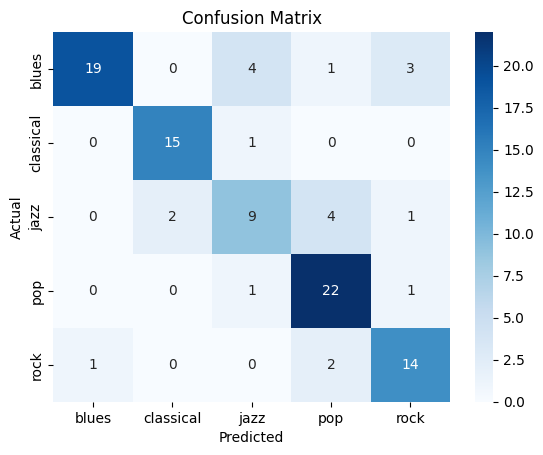

In [29]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()